**Task 1: Wine Quality Prediction**

In [ ]:
pip install pandas numpy seaborn matplotlib scikit-learn xgboost


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd

df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Data Preprocessing**

In [ ]:

df['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [ ]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
df.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
ms = MinMaxScaler()
scaled_data = ms.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

df_scaled.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.5
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.5
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.5
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5


**Selection and Training the Model**

In [ ]:
X, Y = df_scaled.drop('quality', axis=1), df_scaled['quality']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.isnull().sum())
X_train = X_train.dropna()
Y_train = Y_train[X_train.index]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

type                    0
fixed acidity           7
volatile acidity        6
citric acid             2
residual sugar          1
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               2
alcohol                 0
dtype: int64


In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

O**utliers Detection and handling**

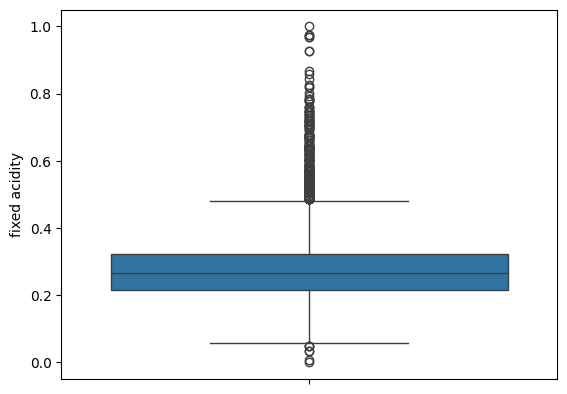

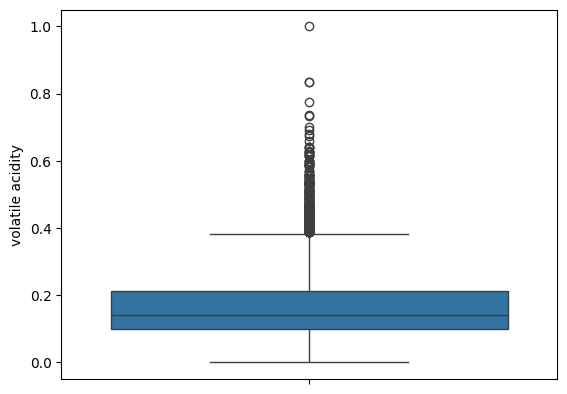

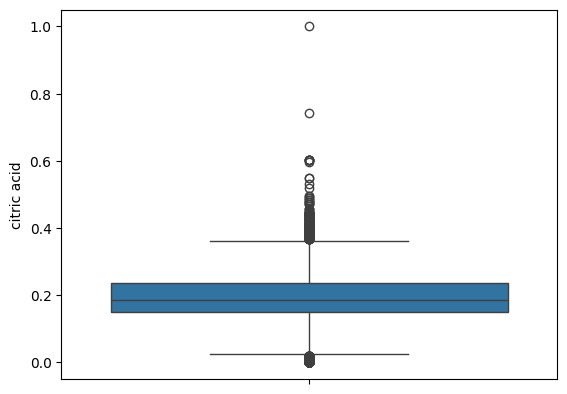

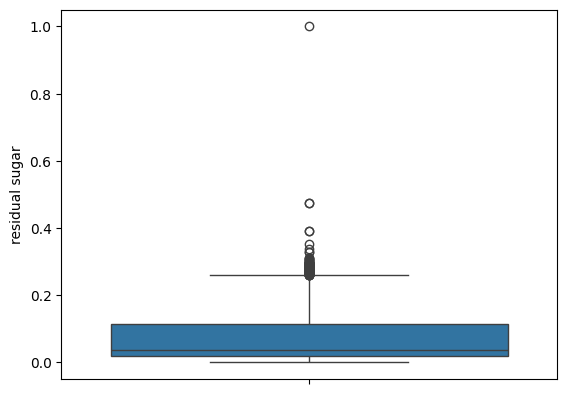

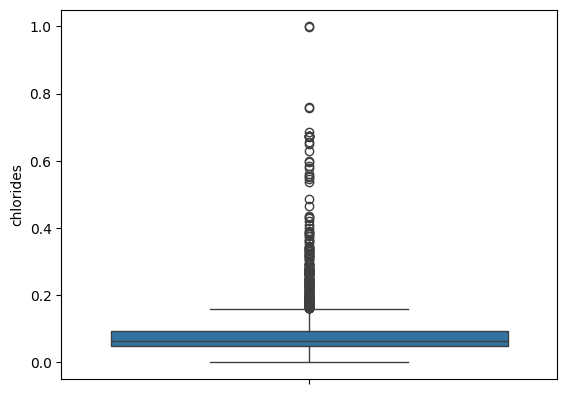

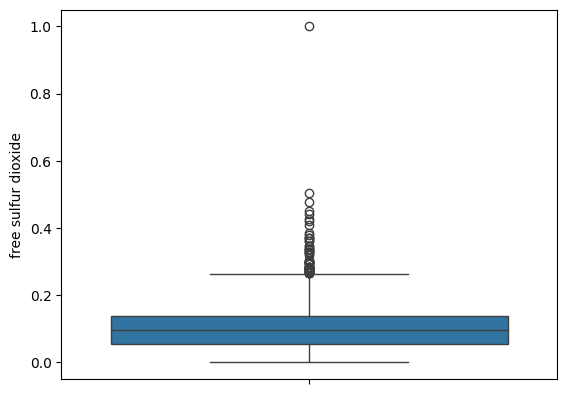

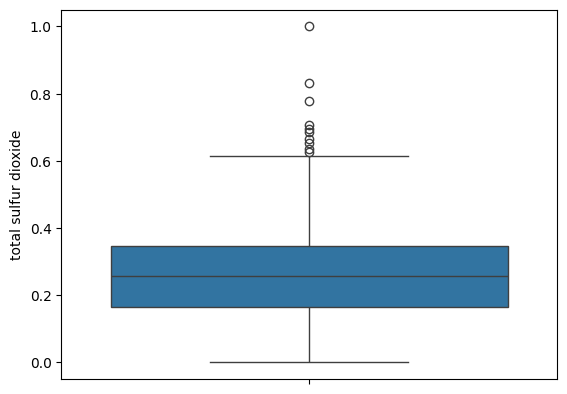

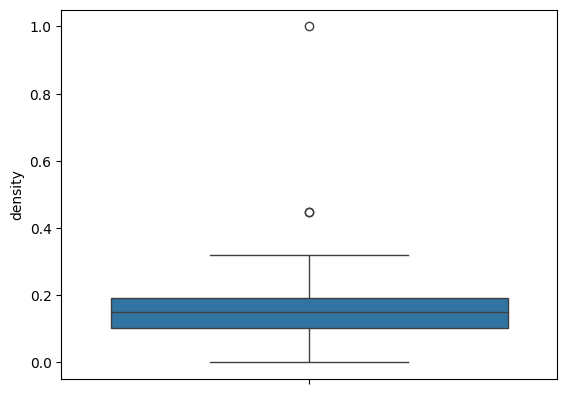

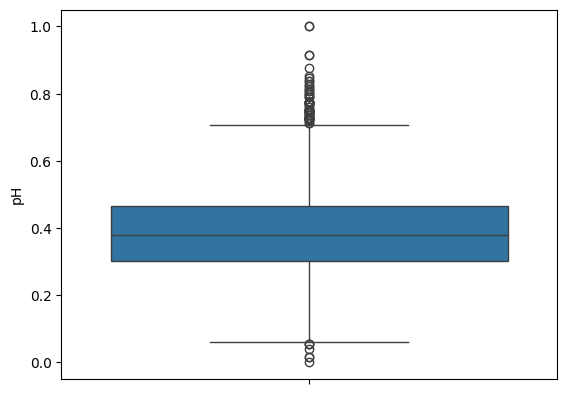

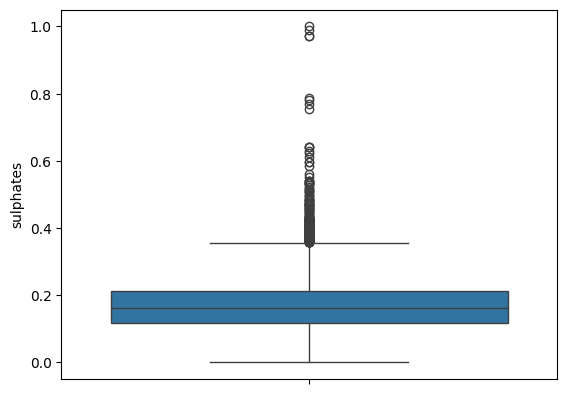

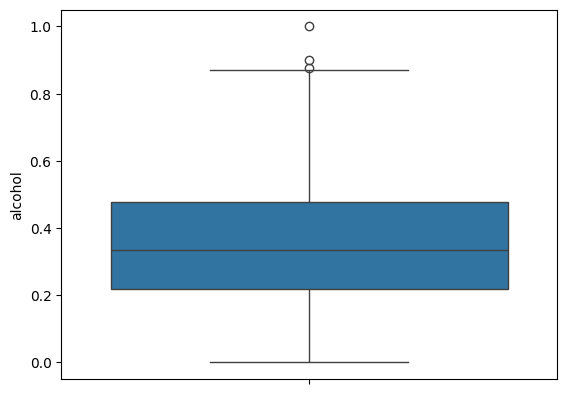

In [ ]:
for i in df_scaled.select_dtypes(include='number').columns:
    if i=='quality' or i=='type':
        continue
    sns.boxplot(data=df_scaled[i])
    plt.show()

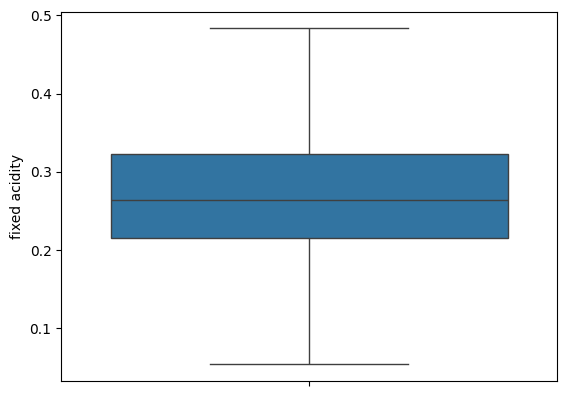

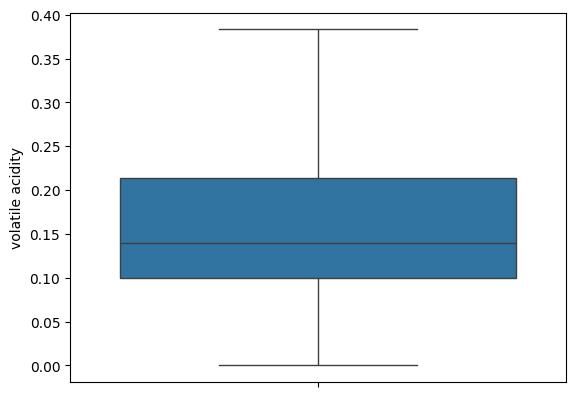

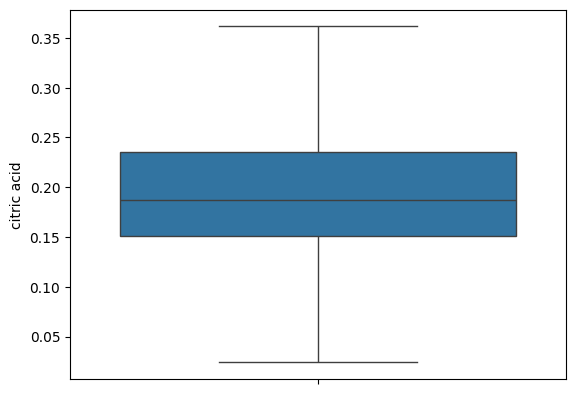

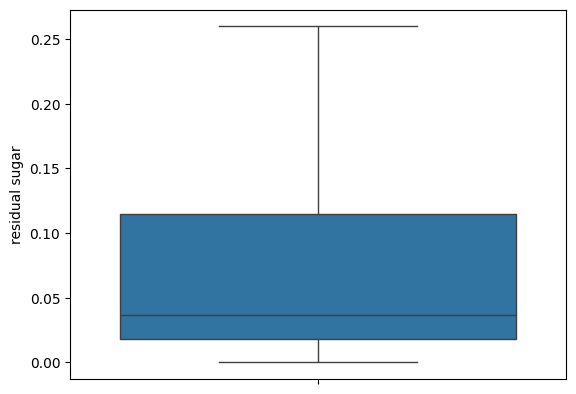

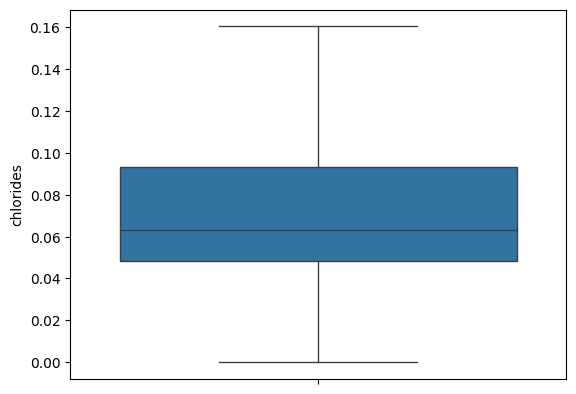

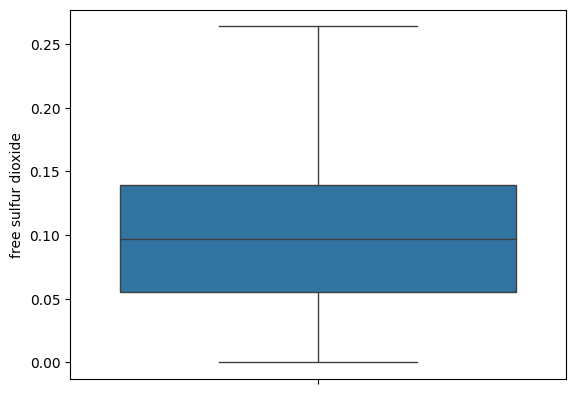

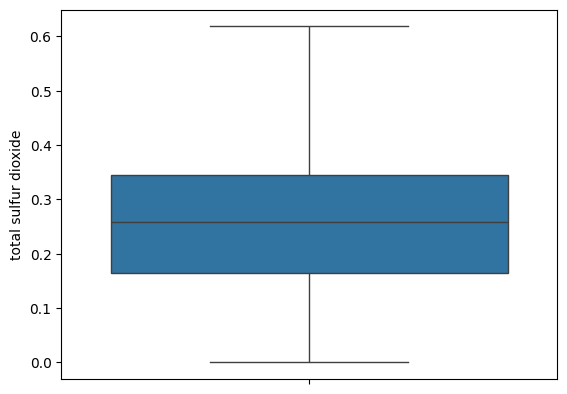

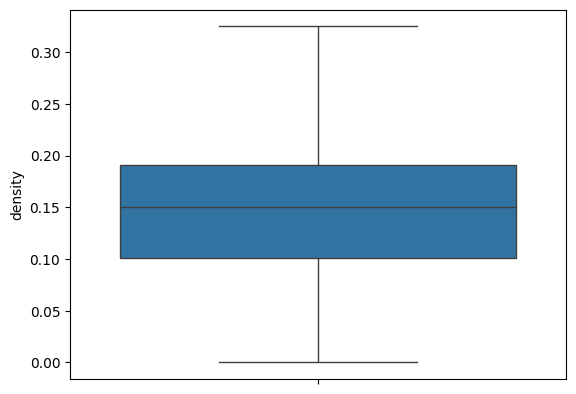

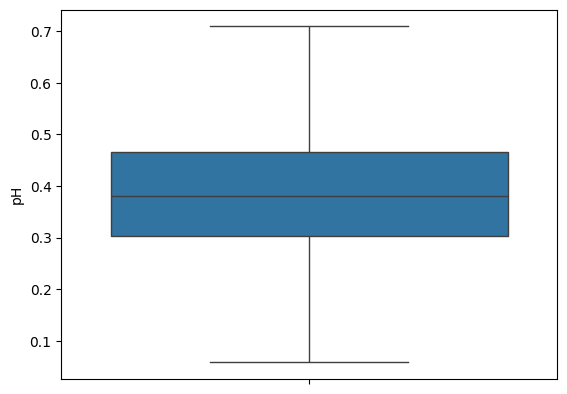

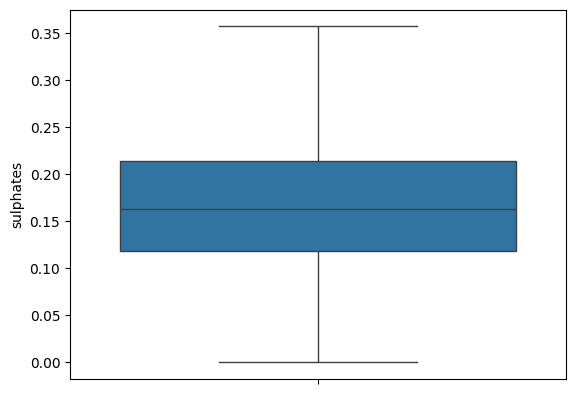

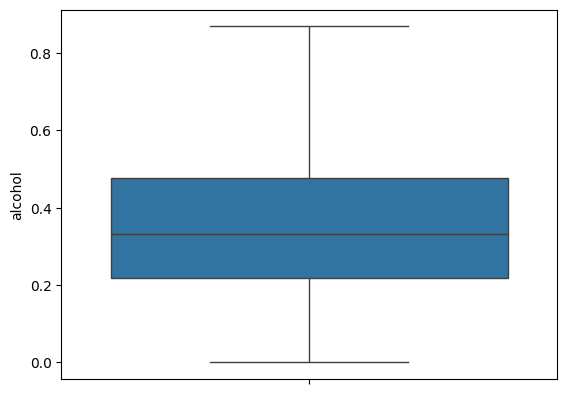

In [ ]:
for i in df_scaled.select_dtypes(include='number').columns:
    if i=='quality' or i=='type':
        continue
    Q1 = df_scaled[i].quantile(0.25)
    Q3 = df_scaled[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df_scaled[i] = np.clip(df_scaled[i], lower_bound, upper_bound)

for i in df_scaled.select_dtypes(include='number').columns:
    if i=='quality' or i=='type':
        continue
    sns.boxplot(data=df_scaled[i])
    plt.show()

**Training and Evaluating the Scaled Dataframe**

In [ ]:
X1, Y1 = df_scaled.drop('quality', axis=1), df_scaled['quality']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Impute missing values in X1_train and X1_test
imputer = SimpleImputer(strategy='mean')
X1_train = imputer.fit_transform(X1_train)
X1_test = imputer.transform(X1_test) # Use the same imputer fitted on X1_train to transform X1_test

lr = LinearRegression()
lr.fit(X1_train, Y1_train)

# Correct the variable name from lrr to lr
Y1_pred = lr.predict(X1_test)
r2_score(Y1_test, Y1_pred)

0.33774348516773245

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_jobs': [-1],
    'fit_intercept': [True, False]
}
rscv = RandomizedSearchCV(lrr, param_grid, cv=5, scoring='r2', n_iter=10)
rscv.fit(X1_train, Y1_train)


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'n_jobs': [-1]},
                   scoring='r2')

In [ ]:

best_lrr = LinearRegression(n_jobs=-1,fit_intercept=True)
best_lrr.fit(X1_train, Y1_train)
Y1_pred_rscv = best_lrr.predict(X1_test)
print("R2 score on test set:", r2_score(Y1_test, Y1_pred_rscv))

R2 score on test set: 0.33774348516773245


In [ ]:
df_pred = pd.DataFrame({'Actual': Y1_test, 'Predicted': Y1_pred_rscv})
df_pred.head(20)

,Actual,Predicted
3103,0.666667,0.563823
1419,0.666667,0.510582
4761,0.500000,0.465506
4690,0.500000,0.407165
4032,0.333333,0.446369
1297,0.666667,0.535148
1773,0.500000,0.449415
5584,0.333333,0.326312
561,0.333333,0.411114
5946,0.500000,0.479338


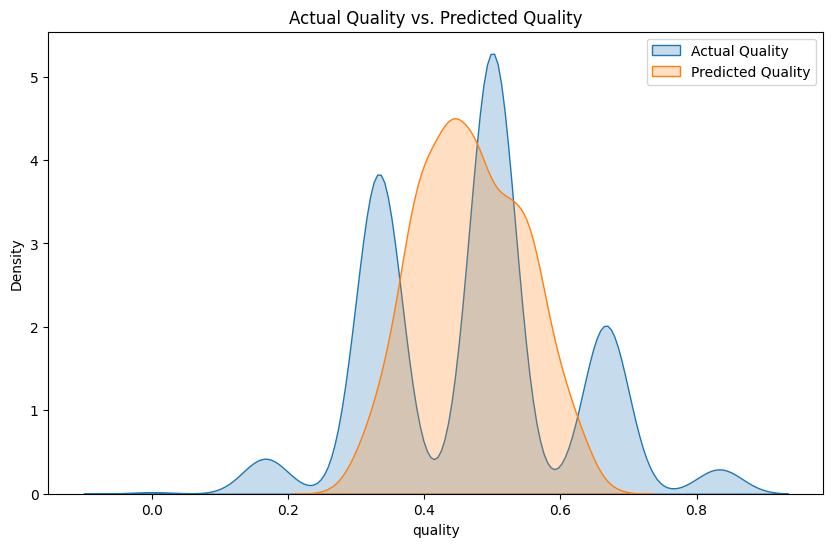

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(Y1_test, label='Actual Quality', fill=True)
sns.kdeplot(Y1_pred_rscv, label='Predicted Quality', fill=True)
plt.title('Actual Quality vs. Predicted Quality')
plt.legend()
plt.show()

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

df_copy = df.copy()
X2 = df_copy.drop('quality', axis=1)
Y2 = df_copy['quality']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X2_train, Y2_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(X2_test)
accuracy_score(Y2_test, dt_pred)

df_copy['quality'].value_counts()


,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [ ]:
Y2_train.value_counts()

,count
quality,
6,2257
5,1718
7,858
4,170
8,161
3,28
9,5


In [ ]:
!pip install imbalanced-learn
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f"Missing values in X2_train: {X2_train.isnull().sum().sum()}")

X2_train.fillna(X2_train.mean(), inplace=True)

smote = SMOTE(k_neighbors=3, random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X2_train, Y2_train)

print(f"Resampled dataset shape: {Counter(Y_resampled)}")

Missing values in X2_train: 28
Resampled dataset shape: Counter({5: 2257, 6: 2257, 7: 2257, 3: 2257, 8: 2257, 4: 2257, 9: 2257})


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X2_train, Y2_train)

rf_pred = rf.predict(X2_test)
accuracy = accuracy_score(Y2_test, rf_pred)
print("Accuracy:", accuracy)

le1 = LabelEncoder()
Y2_train_encoded = le1.fit_transform(Y2_train)

xgb = XGBClassifier(random_state=42)
xgb.fit(X2_train, Y2_train_encoded)

Accuracy: 0.6861538461538461


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_pred = xgb.predict(X2_test)
xgb_pred_original = le1.inverse_transform(xgb_pred)


accuracy = accuracy_score(Y2_test, xgb_pred_original)
print("Accuracy:", accuracy)

data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.2987, 0.4662, 0.5712, 0.5515]
}

df_results = pd.DataFrame(data)
print(df_results)

Accuracy: 0.6753846153846154
               Model  Accuracy
0  Linear Regression    0.2987
1      Decision Tree    0.4662
2      Random Forest    0.5712
3            XGBoost    0.5515
